In [2]:
import pandas as pd
import pandas_datareader as pdr

In [3]:
key=""

In [4]:
df = pd.read_csv(r'C:\Users\shraddhas\Downloads\ipynb folder\KriNa\Stock-MArket-Forecasting-master\Stock-MArket-Forecasting-master\AAPL.csv')

In [5]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [6]:
df1=df.reset_index()['close']

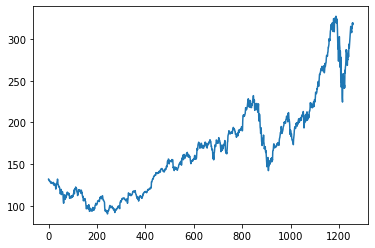

In [7]:

import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [10]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
train_data.shape, test_data.shape

((1006, 1), (252, 1))

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
X_train.shape, y_train.shape, X_test.shape, ytest.shape

((905, 100), (905,), (151, 100), (151,))

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 905 samples, validate on 151 samples
Epoch 1/100
905/905 [==============================] - 8s 9ms/sample - loss: 0.0226 - val_loss: 0.1218
Epoch 2/100
905/905 [==============================] - 2s 3ms/sample - loss: 0.0052 - val_loss: 0.0179
Epoch 3/100
905/905 [==============================] - 2s 2ms/sample - loss: 0.0015 - val_loss: 0.0077
Epoch 4/100
905/905 [==============================] - 2s 2ms/sample - loss: 0.0011 - val_loss: 0.0082
Epoch 5/100
905/905 [==============================] - 2s 2ms/sample - loss: 9.5104e-04 - val_loss: 0.0092
Epoch 6/100
905/905 [==============================] - 2s 2ms/sample - loss: 8.9682e-04 - val_loss: 0.0074
Epoch 7/100
905/905 [==============================] - 2s 2ms/sample - loss: 8.8743e-04 - val_loss: 0.0079
Epoch 8/100
905/905 [==============================] - 2s 2ms/sample - loss: 8.2444e-04 - val_loss: 0.0118
Epoch 9/100
905/905 [==============================] - 2s 2ms/sample - loss: 8.3994e-04 - val_loss: 0.0108
Epoch 1

905/905 [==============================] - 2s 2ms/sample - loss: 3.0067e-04 - val_loss: 0.0045
Epoch 77/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.9973e-04 - val_loss: 0.0036
Epoch 78/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.7217e-04 - val_loss: 0.0024
Epoch 79/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.9407e-04 - val_loss: 0.0032
Epoch 80/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.7099e-04 - val_loss: 0.0019
Epoch 81/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.8694e-04 - val_loss: 0.0019
Epoch 82/100
905/905 [==============================] - 2s 2ms/sample - loss: 3.3416e-04 - val_loss: 0.0026
Epoch 83/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.6761e-04 - val_loss: 0.0024
Epoch 84/100
905/905 [==============================] - 2s 2ms/sample - loss: 2.8119e-04 - val_loss: 0.0022
Epoch 85/100
905/905 [===================

In [21]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

152.39499099733055

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

275.18286905601474

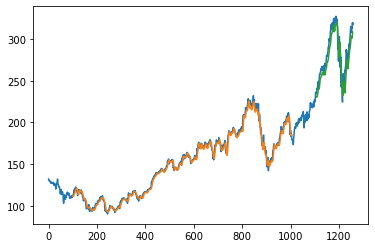

In [25]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

252

In [34]:
x_input=test_data[151:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.8493624926116694,
 0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.74233724563033

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.85835515 0.8866419  0.87431394 0.88431985 0.87836697 0.8986321
 0.92582116 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604
 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027
 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591 0.96474711
 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575 1.
 0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.9

11 day output [[0.861664]]
12 day input [0.96424048 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027
 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591 0.96474711
 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575 1.
 0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.956303

21 day output [[0.7986609]]
22 day input [0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.93468994 0.92919761 0.91933441 0.90903747 0.89964455 0.89152914
 0.88470989 0.8790234

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

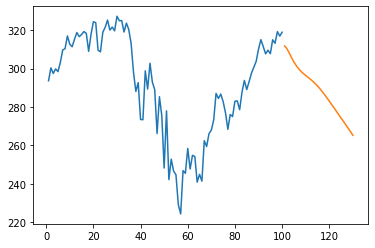

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))